# TP1 

## 3-Decouverte et manipulation de la base MNIST :

### 3.1-Chargement des bibliotheques Python :

In [383]:

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot
from matplotlib import image
from sklearn import datasets
import pandas 
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import hog 
import tkinter as tk
from PIL import Image, ImageTk
from sklearn.neural_network import MLPClassifier
from skimage.transform import resize
import matplotlib.patches as patches
from sklearn.svm import OneClassSVM
import matplotlib.image as mpimg

### 3.2-Chargement des donnees :

In [2]:
X,y = datasets.fetch_openml(name='mnist_784', version=1, return_X_y=True)
X=X/255 # normalisation de X
np.shape(X)

(70000, 784)

le nombre d'images de la matrice X est : 70000

In [3]:
# isoler un vecteur de la matrice X
X = X*255
X= np.array(X)
X1=X[1]
X2=X1.reshape(28,28)
print(X2.T)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.  76.  85.  85.  85.  86.  85.  85.  28.   0.   0.  

#### REMARQUES :

les valeurs prises par les diferents pixels varient entre 0 et 255 et  
je supose que le 0 coorespend au noir et le reste des chiffres au blanc

In [4]:
X = X/255

In [5]:
X1_1=X[1]
X2_1=X1_1.reshape(28,28)
X3_1 = X2_1.T
X4_1 = X3_1 / 255
print(X4_1)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

#### remarques

apres la normalisation de X les valeurs prises par les differents ixel sont comprises entre 0 et 1

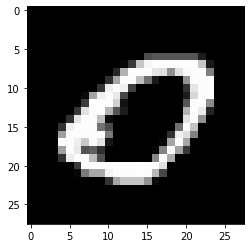

In [6]:
#visiualiser l'image
image = X3_1
pyplot.imshow(image,cmap="gray")

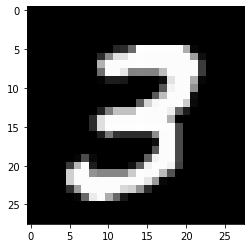

In [7]:
# visualiser une image avec une etiquette donne :
X[y =="3"]
image = np.array(X[y =="3"][0])
image = image.reshape(28,28)
pyplot.imshow(image,cmap="gray")

#### REMARQUES

le chiffre correspendt bien a l'etiquete donne

In [8]:
# afficher la taille de chaques classe de la base de donnes X :
i=0
while i<=9 :
    j=str(i)
    z=X[y ==j]
    k=np.shape(z)
    print("la taille des differentes sous-matrices pour le chiffre",i,"est :",k)
    i=i+1

la taille des differentes sous-matrices pour le chiffre 0 est : (6903, 784)
la taille des differentes sous-matrices pour le chiffre 1 est : (7877, 784)
la taille des differentes sous-matrices pour le chiffre 2 est : (6990, 784)
la taille des differentes sous-matrices pour le chiffre 3 est : (7141, 784)
la taille des differentes sous-matrices pour le chiffre 4 est : (6824, 784)
la taille des differentes sous-matrices pour le chiffre 5 est : (6313, 784)
la taille des differentes sous-matrices pour le chiffre 6 est : (6876, 784)
la taille des differentes sous-matrices pour le chiffre 7 est : (7293, 784)
la taille des differentes sous-matrices pour le chiffre 8 est : (6825, 784)
la taille des differentes sous-matrices pour le chiffre 9 est : (6958, 784)


#### REMARQUES :

on peut voir que certe la taille des differentes sous-matrices pour chaque chiffre n'est pas exactement la meme, mais d'un point de vue generale on peut considerer que la base de donnes est equilibre

In [9]:
# tester l'operateur "+":
print(X[( y =="3")+( y == "4")])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### REMARQUES :

l'opérateur + correspond à la jonction entre les deux ensemble cependant l'operateur * correspond à l'intersection entre les deux ensemble  

In [10]:
#creer la base de donnes x_bin
X_bin = X[(y=='0')+(y=='1')]
print(X_bin)
print(np.shape(X_bin))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(14780, 784)


#### REMARQUES :

on voit que 14780= 6903+7877(les taille des sous matrice de 0 et 1),donc x_bin contient bien que les 0 et 1 contenu dans X
et cela permet d'avoir acces a une base de donnes moins volimuneuse et qui cotient que des element dont on a besoin

Text(0.5, 1.0, 'Image 4')

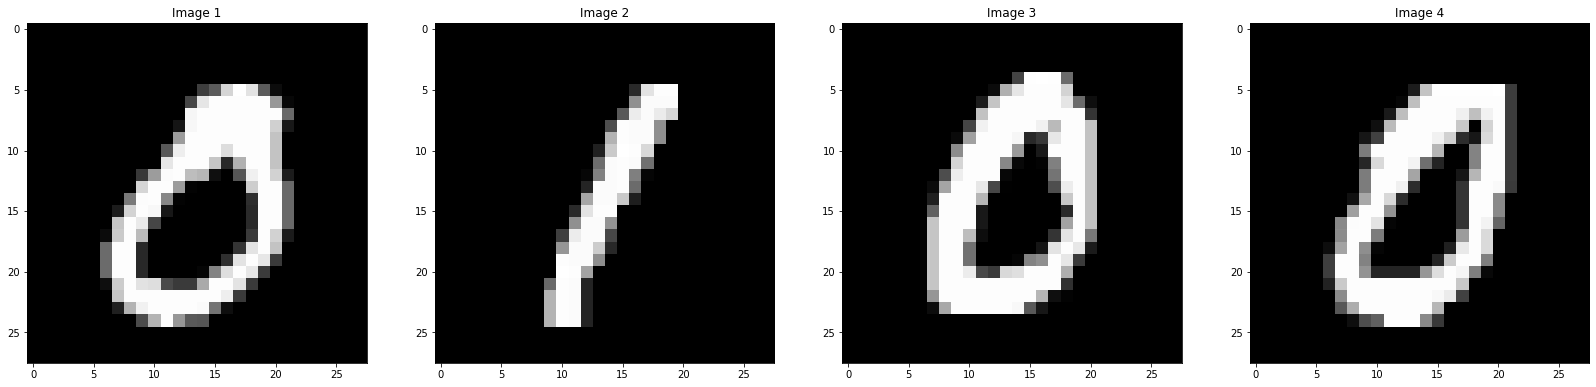

In [11]:
# afficher 4 images de la base de donnes X_bin :
fig, (ax1 , ax2 , ax3 , ax4) = pyplot.subplots(1, 4, figsize =(28, 28))
img1 = X_bin[20] 
img2 = X_bin[21]
img3 = X_bin[25]
img4 = X_bin[23]
ax1.imshow(img1.reshape(28,28),cmap="gray")
ax1.set_title("Image 1")

ax2.imshow(img2.reshape(28,28),cmap="gray")
ax2.set_title("Image 2")

ax3.imshow(img3.reshape(28,28),cmap="gray")
ax3.set_title("Image 3")

ax4.imshow(img4.reshape(28,28),cmap="gray")
ax4.set_title("Image 4")

### 3.3-Preparation des bases de donnees d’entrainement et test :

In [12]:

X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = X[:52500], X[52500:], y[:52500], y[52500:]
# je choisis de separer la base de donnes en ratio de 7.5/2.5 car d'habitude on fait un ratio 8/2 mais je voulais laisser plus de donnes pour tester l'IA

### 3.4 Manipulation des images :

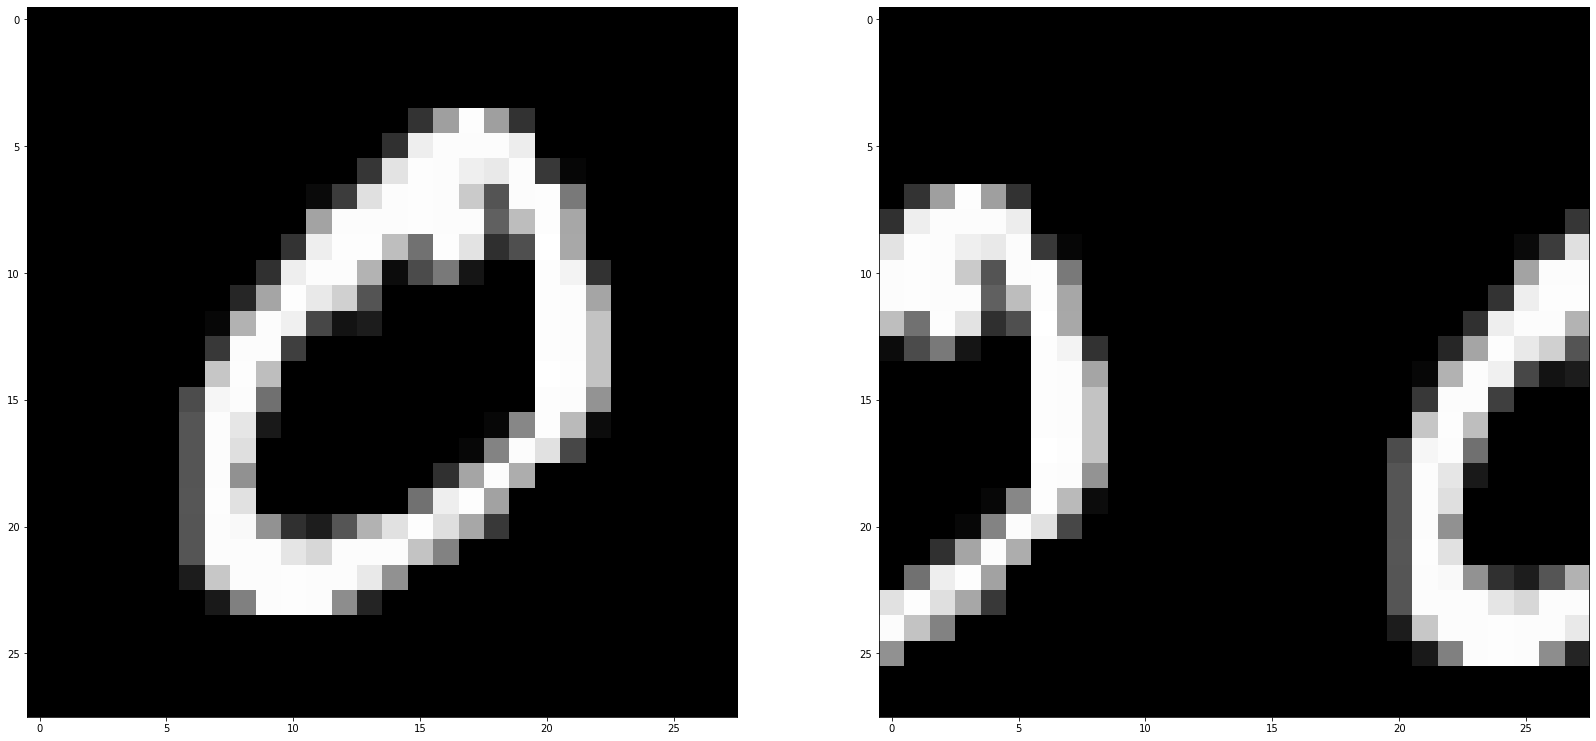

In [13]:
# decaler les images :

fig, (ax1 , ax2) = pyplot.subplots(1, 2, figsize =(28, 28))

f1 = X[1].reshape(28,28)
f2 = np.roll(f1, 70) 

ax1.imshow(f1,cmap="gray")
ax2.imshow(f2, cmap="gray")

#### REMARQUES :

on remarque que l'image se decale et cela peut utile pour replacer des images

### 3.5-Recapitulons

(14780, 784)

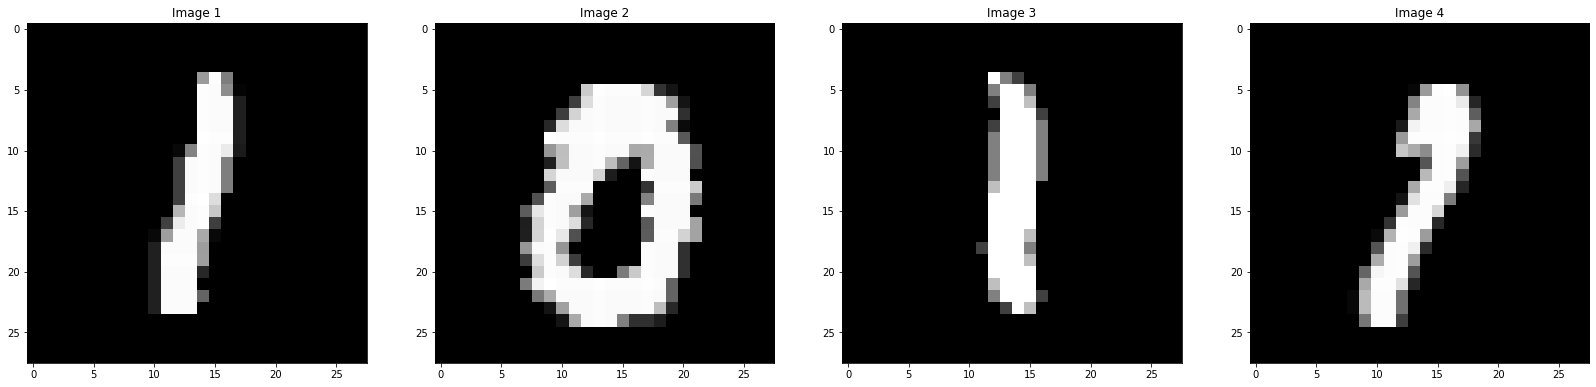

In [14]:
# creer la classe Z avec deux chiffres :

classe0 = X[y=='0']
classe1 = X[y=='1']
classeZ_X = X[(y=='0')+(y=='1')]
classeZ_y = y[(y=='0')+(y=='1')]
np.shape(classeZ_X)





fig, (ax1 , ax2 , ax3 , ax4) = pyplot.subplots(1, 4, figsize =(28, 28))

img1 = classeZ_X[58]
img2 = classeZ_X[17]
img3 = classeZ_X[299]
img4 = classeZ_X[788]

ax1.imshow(img1.reshape(28,28), cmap="gray")
ax1.set_title("Image 1")

ax2.imshow(img2.reshape(28,28), cmap="gray")
ax2.set_title("Image 2")

ax3.imshow(img3.reshape(28,28), cmap="gray")
ax3.set_title("Image 3")

ax4.imshow(img4.reshape(28,28), cmap="gray")
ax4.set_title("Image 4")
np.shape(classeZ_X)

# TP 2 

## 2-Classification par SVM
### 2.1 Classification binaire lineaire :


In [15]:
#pour créer un jeux de donnes qui contient que 2 chiffres j'utilise la classeZ qui contient que des 3 et 8
from sklearn.model_selection import train_test_split
classeZ_X_train, classeZ_X_test, classeZ_y_train, classeZ_y_test  = train_test_split(classeZ_X,classeZ_y, test_size = 0.25)
from sklearn import svm
classifier_binaire_linear = svm.SVC( kernel = 'linear', gamma = 'scale', shrinking = False,probability=True)
classifier_binaire_linear.fit( classeZ_X_train , classeZ_y_train )
y_est = classifier_binaire_linear.predict ( classeZ_X_test )
classifier_binaire_linear.score ( classeZ_X_test , classeZ_y_test )


0.9986468200270636

#### REMARQUES :

le score obtenue quand on teste l'algorithme sur la base d'entrainement on ontient 96,21%

le score obtenue quand on teste l'algorithme sur la base de test on ontient 98.91%
on remarque que les scores sont a peu pres similaire, etant donne que notre base donnes est assez petite

In [16]:
# verification que le nombre de donnes commun  en pourcentage, au vecteur label vector et au vecteur y yest correspond bien au score retourne par classifier.score :
print(classeZ_y_test==y_est)
print(np.sum(classeZ_y_test==y_est)/ 3492)

37441    True
52906    True
19768    True
24842    True
43236    True
         ... 
15608    True
61826    True
17535    True
34662    True
48791    True
Name: class, Length: 3695, dtype: bool
1.056701030927835


#### REMARQUES :


on voit que le nombre de donnees communes, en pourcentage, au vecteur label vector et au
vecteur y yest correspond bien au score retourne par classifier.score

### BONUS

confirmation que :
- tous les points x d’une meme classe (disons les ’3’), et qui sont correctement classes, ont
une valeur de ωTx + b de signe constant; et que les points correctement classes de l’autre
classe ont un signe oppose

In [17]:
# les point x de la classe 3 correctement places ont un signe negative :
np.sum(classifier_binaire_linear.coef_[0]@classeZ_X[classeZ_y == "0"].T+classifier_binaire_linear.intercept_[0]<0)/np.sum(classeZ_y=='0') 

0.9994205417934231

In [18]:
# les point x de la classe 8 correctement places ont un signe positive :
np.sum(classifier_binaire_linear.coef_[0]@classeZ_X[classeZ_y == "1"].T+classifier_binaire_linear.intercept_[0]>0)/np.sum(classeZ_y=='1') 

0.9998730481147645

confirmation que :
- que les points x mal class´es ont un signe oppe à ce qu’il devrait etre :

In [19]:
# les point x de la classe 3 mal places ont un signe positive au lieu de negative 
np.sum(classifier_binaire_linear.coef_[0]@classeZ_X[classeZ_y == "0"].T+classifier_binaire_linear.intercept_[0]>0)/np.sum(classeZ_y=='0')


0.0005794582065768506

In [20]:
# les point x de la classe 8 mal places ont un signe negative au lieu de positive :
np.sum(classifier_binaire_linear.coef_[0]@classeZ_X[classeZ_y == "0"].T+classifier_binaire_linear.intercept_[0]<0)/np.sum(classeZ_y=='0') 

0.9994205417934231

REMARQUES :
- 96.41% des points x de la classe y=3 ont un signe (-)[bien place] et 3.58% des points x de la classe y=3 ont un signe (+)[mal places]
- 96.43% des points x de la classe y=8 ont un signe (+)[bien place] et 3.56% des points x de la classe y=8 ont un signe (-)[mal places]

### 2.2-Classification generique :

In [21]:
#1_SVM non lineaire:
classifier_rbf_binaire = svm.SVC( kernel = 'rbf', gamma = 'scale', shrinking = False,probability=True)
classifier_rbf_binaire.fit( classeZ_X_train , classeZ_y_train )
y_est = classifier_rbf_binaire.predict ( classeZ_X_test )
classifier_rbf_binaire.score ( classeZ_X_test , classeZ_y_test )


0.9986468200270636

REMARQUES :

- quand on teste l'algorithme sur la base d'entrainement avec un svm non linearire  on ontient 99,46% au lieu de 98.03% avec un svm lineaire
- le score obtenue quand on teste l'algorithme sur la base de test avec un algo non lineaire est 99.42% au lieu de 99.25% avec un algo lineaire

In [22]:
#2_SVM LINEAIRE SUR LA GRANDE BASE DE DONNES #base entrainement
classifier_linear = svm.SVC( kernel = 'linear', gamma = 'scale', shrinking = False,probability=True)
X_train, X_test, y_train, y_test = X[:52500], X[52500:], y[:52500], y[52500:]
classifier_linear.fit( X_train , y_train )
y_est = classifier_linear.predict ( X_test )
classifier_linear.score (X_test ,y_test )


0.9409714285714286

In [23]:
#2_SVM non LINEAIRE rbf SUR LA GRANDE BASE DE DONNES #base entrainement
classifier_rbf = svm.SVC( kernel = 'rbf', gamma = 'scale' , shrinking = False,probability=True)
X_train, X_test, y_train, y_test = X[:52500], X[52500:], y[:52500], y[52500:]
classifier_rbf.fit( X_train , y_train )
y_est = classifier_rbf.predict ( X_test )
classifier_rbf.score (X_test ,y_test )

0.98

In [24]:
#2_SVM non LINEAIRE poly SUR LA GRANDE BASE DE DONNES #base entrainement
classifier_poly = svm.SVC( kernel = 'poly', gamma = 'scale', shrinking = False,probability=True)
X_train, X_test, y_train, y_test = X[:52500], X[52500:], y[:52500], y[52500:]
classifier_poly.fit( X_train , y_train )
y_est = classifier_poly.predict ( X_test )
classifier_poly.score (X_test ,y_test )

0.9777142857142858

In [25]:
#2_SVM non LINEAIRE sigmoid SUR LA GRANDE BASE DE DONNES #base entrainement
classifier_sigmoid = svm.SVC( kernel = 'sigmoid', gamma = 'scale', shrinking = False,probability=True)
X_train, X_test, y_train, y_test = X[:52500], X[52500:], y[:52500], y[52500:]
classifier_sigmoid.fit( X_train , y_train )
y_est = classifier_sigmoid.predict ( X_test )
classifier_sigmoid.score (X_test ,y_test )

0.7905142857142857

REMARQUES :
- apres avoir esseyer e diiferents  svm lineaire et des svm non lineaire comme : RBF, POLY ET SIGMOID. on constate une differnece dans les scores obtenus par chaque SVM, et cela est impactè par plusieurs facteurs :
- 1-le type d'SVM : en effet on peut definir le claasment suivant :
      - SVM lineàire 
      - RBF
      - POLY
      - SEGMOID
- 2- pour les SVM non lineaires :
   - SUR LA BASE DE TEST :
      - plus la valeur de gamma diminue la precision de :
          - RBF : diminue
          - POLY : diminue
          - segmoid : augmente 

## 2.3-Classification des representations HOG :

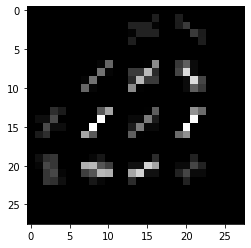

In [26]:
#esseyer la fanction hog sur une image
image = X[y =="0"][50]
image = image.reshape(28,28)
fd , hog_image = hog(image, orientations=10, pixels_per_cell=(6, 6),cells_per_block=(1, 1), visualize=True)
pyplot.imshow(hog_image,cmap="gray")


In [27]:
#trensformer X en X_hog :
X_hog = []
for i in X:
    fd = hog(i.reshape((28,28)), orientations=10, pixels_per_cell=(6, 6),cells_per_block=(1, 1))
    X_hog.append(fd)
np.shape(X_hog)

(70000, 160)

In [28]:
#refaire la partie 2.1 avec X_hog :
#2_SVM LINEAIRE SUR LA GRANDE BASE DE DONNES #base entrainement
classifier_hog_linear = svm.SVC( kernel = 'linear', gamma = 'scale', shrinking = False,probability=True)
X_train, X_test, y_train, y_test = X_hog[:52500], X_hog[52500:], y[:52500], y[52500:]
classifier_hog_linear.fit( X_train , y_train )
y_est = classifier_hog_linear.predict ( X_test )
classifier_hog_linear.score (X_test ,y_test )

0.9655428571428571

In [29]:
#2_SVM non LINEAIRE rbf SUR LA GRANDE BASE DE DONNES #base entrainement
classifier_hog_rbf = svm.SVC( kernel = 'rbf', gamma = 'scale' , shrinking = False,probability=True)
X_train, X_test, y_train, y_test = X_hog[:52500], X_hog[52500:], y[:52500], y[52500:]
classifier_hog_rbf.fit( X_train , y_train )
y_est = classifier_hog_rbf.predict ( X_test )
classifier_hog_rbf.score (X_test ,y_test )

0.9778285714285714

In [30]:
#2_SVM non LINEAIRE poly SUR LA GRANDE BASE DE DONNES #base entrainement
classifier_hog_poly = svm.SVC( kernel = 'poly', gamma = 'scale', shrinking = False,probability=True)
X_train, X_test, y_train, y_test = X_hog[:52500], X_hog[52500:], y[:52500], y[52500:]
classifier_hog_poly.fit( X_train , y_train )
y_est = classifier_hog_poly.predict ( X_test )
classifier_hog_poly.score (X_test ,y_test )

0.9788

In [31]:
#2_SVM non LINEAIRE sigmoid SUR LA GRANDE BASE DE DONNES #base entrainement
classifier_hog_sigmoid = svm.SVC( kernel = 'sigmoid', gamma = 'scale', shrinking = False,probability=True)
X_train, X_test, y_train, y_test = X_hog[:52500], X_hog[52500:], y[:52500], y[52500:]
classifier_hog_sigmoid.fit( X_train , y_train )
y_est =classifier_hog_sigmoid.predict ( X_test )
classifier_hog_sigmoid.score(X_test ,y_test )

0.8992

REMARQUES :
- apres avoir esseyer e diiferents  svm lineaire et des svm non lineaire comme : RBF, POLY ET SIGMOID. on constate une differnece dans les scores obtenus par chaque SVM.
- en effet on peut definir le classement suivant selon le type d'SVM :
   - POLY 
   - RBF
   - SVM lineàire
   - SEGMOID


## 2.4 Des scores aux probabilites:

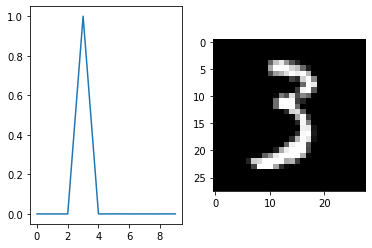

In [32]:
# tracez un graphique d’abscisses ’0’, ’1’, . . . , ’9’ et d'ordonnees les probabilites associees a chaque classe :
chiffre = 3
nbrImg = 150

image = X[y == str(chiffre)][nbrImg]
image = image.reshape(28,28)
fd , hog_image =hog(image, orientations=10, pixels_per_cell=(6, 6),cells_per_block=(1, 1), visualize=True)

liste_y = classifier_hog_rbf.predict_proba(fd.reshape(1, -1))
liste_x = [ 0,1,2,3,4,5,6,7,8,9]

fig, (ax_hist , ax_img) = pyplot.subplots(1,2)
ax_img.imshow(image,cmap="gray")
ax_hist.plot(liste_x,liste_y.reshape(10))

## 3 Classification kNN :

In [33]:
# creer un couple matrice-vecteur X_red,y_red une version reduite de X,y a un maximum de 1 000 elements :
X_red,y_red=X[:1000],y[:1000]

In [34]:
# diviser la base X_red en base d'entrainement et base de test :
X_train, X_test, y_train, y_test = X_red[:750], X_red[750:], y_red[:750], y_red[750:]

In [35]:
# tester le knn pour differentes valeur de n_neighbors :
i = 1
while i <= 50 :
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    print("pour n_neighbors = ",i ,"est :",knn.score(X_test,y_test))
    i=i+1

pour n_neighbors =  1 est : 0.88
pour n_neighbors =  2 est : 0.848
pour n_neighbors =  3 est : 0.868
pour n_neighbors =  4 est : 0.872
pour n_neighbors =  5 est : 0.852
pour n_neighbors =  6 est : 0.864
pour n_neighbors =  7 est : 0.848
pour n_neighbors =  8 est : 0.848
pour n_neighbors =  9 est : 0.848
pour n_neighbors =  10 est : 0.836
pour n_neighbors =  11 est : 0.836
pour n_neighbors =  12 est : 0.836
pour n_neighbors =  13 est : 0.824
pour n_neighbors =  14 est : 0.824
pour n_neighbors =  15 est : 0.824
pour n_neighbors =  16 est : 0.84
pour n_neighbors =  17 est : 0.824
pour n_neighbors =  18 est : 0.82
pour n_neighbors =  19 est : 0.824
pour n_neighbors =  20 est : 0.824
pour n_neighbors =  21 est : 0.828
pour n_neighbors =  22 est : 0.832
pour n_neighbors =  23 est : 0.828
pour n_neighbors =  24 est : 0.828
pour n_neighbors =  25 est : 0.824
pour n_neighbors =  26 est : 0.828
pour n_neighbors =  27 est : 0.82
pour n_neighbors =  28 est : 0.812
pour n_neighbors =  29 est : 0.80

REMARQUES :
- c'est risquè de prendre un seul voisin parceque quand on a un seul voisin le knn a plus de chance de se tremper si par exemple on a un 1 et que le voisi cést un 7 alors le knn va se tremper et cela est aussi le cas quand le nombre de voisins augment ce qui augment le ombre de possebilitès et du coup la marge d'erreur.   
- on prends generalement des voisin impair pour eviter la confusion dans le cas ou par exemple on 8 voisins et on 4 d'entre eux c'est des 7 et le reste c'est des 1.

### refaire la partie 2 avec KNN :

#### avec deux classess

In [36]:
#refaire la partie 2 
#avec deux classess
classeZ_X_knn= X_red[(y_red=='3')+(y_red=='8')]
classeZ_y_knn = y_red[(y_red=='3')+(y_red=='8')]
np.shape(classeZ_X_knn)
#pour créer un jeux de donnes qui contient que 2 chiffres j'utilise la classeZ qui contient que des 3 et 8
from sklearn.model_selection import train_test_split
classeZ_X_train, classeZ_X_test, classeZ_y_train, classeZ_y_test  = train_test_split(classeZ_X_knn,classeZ_y_knn, test_size = 0.25)
from sklearn import svm
classifier_knn_linear = svm.SVC( kernel = 'linear', gamma = 'scale', shrinking = False,probability=True)
classifier_knn_linear.fit( classeZ_X_train , classeZ_y_train )
y_est = classifier_knn_linear.predict ( classeZ_X_test )
classifier_knn_linear.score ( classeZ_X_test , classeZ_y_test )


0.9555555555555556

#### avec toutes les classes

#####  1-avec les donnees brutes :

In [37]:
X_red,y_red=X[:1000],y[:1000]
X_train, X_test, y_train, y_test = X_red[:750], X_red[750:], y_red[:750], y_red[750:]
knn_X = KNeighborsClassifier(n_neighbors = 4)
knn_X.fit(X_train,y_train)
y_est = knn_X.predict(X_train)
knn_X.score(X_test,y_test)

0.872

#####  2-avec les representations HOG :

In [38]:
X_red,y_red= X_hog[:1000],y[:1000]
X_train, X_test, y_train, y_test = X_red[:750], X_red[750:], y_red[:750], y_red[750:]
knn_hog = KNeighborsClassifier(n_neighbors = 5)
knn_hog.fit(X_train,y_train)
y_est = knn_hog.predict(X_train)
knn_hog.score(X_test,y_test)

0.896

REMARQUES :
- les performences du KNN sont pas assez bonnes parraport aux SVM, la difference entre les deux est a vitesse du KNN parraport aux svm mais les scores sont mauvais contrairement aux SVM qui proposaient des scores assez eleves

In [39]:
# EN PRENANT n_neighbors = 1 :
X_red,y_red= X_hog[:1000],y[:1000]
X_train, X_test, y_train, y_test = X_red[:750], X_red[750:], y_red[:750], y_red[750:]
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
y_est = knn.predict(X_train)
knn.score(X_test,y_test)

0.884

REMARQUES :
- on observe que la marge d'erreur sur la base d'entrainemet quand  n_neighbors = 1 est assez importante et cela est assez evident car en classification k-NN, le résultat est une classe d'appartenance ou l'objet d'entrée est classifié selon le résultat majoritaire des statistiques de classes d'appartenance de ses k plus proches voisins et si k = 1, alors l'objet est affecté à la classe d'appartenance de son proche voisin ce qui peut augmenter la marge d'erreur


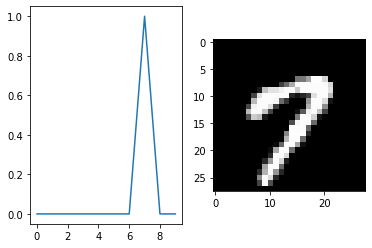

In [40]:
# tracez un graphique d’abscisses ’0’, ’1’, . . . , ’9’ et d'ordonnees les probabilites associees a chaque classe :
X_red,y_red= X[:1000],y[:1000]
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_red,y_red)



chiffre = 7
nbrImg = 0

image = X_red[y_red == str(chiffre)][nbrImg]
image = image.reshape(28,28)

liste_y = knn.predict_proba(X_red[y_red==str(chiffre)][nbrImg].reshape(1,-1))
liste_x = [ 0,1,2,3,4,5,6,7,8,9]

fig, (ax_hist , ax_img) = pyplot.subplots(1,2)
ax_img.imshow(image,cmap="gray")
ax_hist.plot(liste_x,liste_y.reshape(10))


# TP 3 
## 2-Perceptron mono-couche :

In [41]:
classifier_mlp_mono = MLPClassifier(hidden_layer_sizes=(450),activation='relu',max_iter=10 , alpha=1e-4,solver='sgd', verbose=10, random_state=1,learning_rate_init=0.1)
X_train, X_test, y_train, y_test = X[:52500], X[52500:], y[:52500], y[52500:]
classifier_mlp_mono.fit( X_train , y_train )


Iteration 1, loss = 0.29225965
Iteration 2, loss = 0.11708450
Iteration 3, loss = 0.07865910
Iteration 4, loss = 0.05817048
Iteration 5, loss = 0.04362384
Iteration 6, loss = 0.03386229
Iteration 7, loss = 0.02598362
Iteration 8, loss = 0.02078098
Iteration 9, loss = 0.01544451
Iteration 10, loss = 0.01238787


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=450, learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

REMARQUES :
- la fonction fit() retourne  le minimum d'erreur d'apprentissage à chaque descente de gradient ou à chaque iteration 

In [42]:
y_est = classifier_mlp_mono.predict ( X_train )
classifier_mlp_mono.score (X_train ,y_train)

0.9990857142857142

In [43]:
y_est = classifier_mlp_mono.predict ( X_test)
classifier_mlp_mono.score (X_test ,y_test)

0.9821714285714286

In [44]:
np.shape(classifier_mlp_mono.coefs_)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(2,)

## 3-Generalisation au cas multi-couches :
### 3.1-Donnees MNIST brutes :

In [45]:
classifier_mlp_multi = MLPClassifier(hidden_layer_sizes=(50, 50 ,50),activation='relu',max_iter=10 , alpha=1e-4,solver='sgd', verbose=10, random_state=30,learning_rate_init=0.1)
X_train, X_test, y_train, y_test = X[:52500], X[52500:], y[:52500], y[52500:]
classifier_mlp_multi.fit( X_train , y_train )

Iteration 1, loss = 0.37839680
Iteration 2, loss = 0.14907748
Iteration 3, loss = 0.11170197
Iteration 4, loss = 0.09120282
Iteration 5, loss = 0.08074604
Iteration 6, loss = 0.07049237
Iteration 7, loss = 0.06763384
Iteration 8, loss = 0.05862530
Iteration 9, loss = 0.05525531
Iteration 10, loss = 0.04749608


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1,
              max_iter=10, random_state=30, solver='sgd', verbose=10)

expliquer pourquoi une reseau de neurones multi-couches est meilleur :

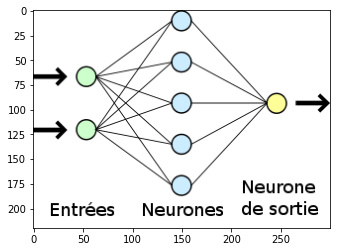

In [384]:
#afficher une representation d'un reseau mono-couche :

img = mpimg.imread('reseaux_neurones_feed_forwarded.png')
imgplot = pyplot.imshow(img)
pyplot.show()


- Le perceptron mono-couche dispose que de deux couches ; la couche en entrée et la couche en sortie.Le traitement de la donnée dans ce réseau se fait entre la couche d’entrée et la couche de sortie qui sont toutes reliées entre elles. Le réseau intégral ne dispose ainsi que d’une matrice de poids. Le fait de disposer d’une seule matrice de poids limite le perceptron mono-couche à un classificateur linéaire permettant de diviser l’ensemble d’informations obtenues en deux catégories distingues


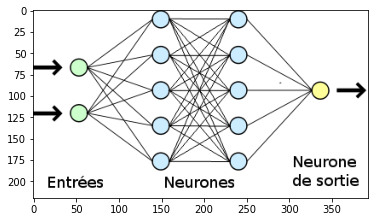

In [385]:
#afficher une representation d'un reseau multi-couche :
img = mpimg.imread('reseaux_neurones_feed_forwarded_2.png')
imgplot = pyplot.imshow(img)
pyplot.show()

- Le perceptron multicouche se structure de la même façon. L’information entre par une couche d’entrée et sort par une couche de sortie. À la différence du mono-couche, le perceptron multicouche dispose entre la couche en entrée et la couche en sortie une ou plusieurs couches cachées. Le nombre de couches correspond aux nombres de matrices de poids dont disposent le réseau. Un perceptron multicouche est donc plus efficace et cela nous permet de reduire le nombre de neurones par couche

In [48]:
y_est = classifier_mlp_multi.predict ( X_train )
classifier_mlp_multi.score (X_train ,y_train)

0.9828190476190476

In [49]:
y_est = classifier_mlp_multi.predict ( X_test)
classifier_mlp_multi.score (X_test ,y_test)

0.9691428571428572

In [50]:
i=0
while i <= 3 :
    print(np.shape( classifier_mlp_multi.coefs_[i]))
    i+=1

(784, 50)
(50, 50)
(50, 50)
(50, 10)


on remarque qu'il existe :
- une couche d'entre d'une taille de 784 
- 3 couches cachees de taille de 50
- une couche de sortie de taille de 10 


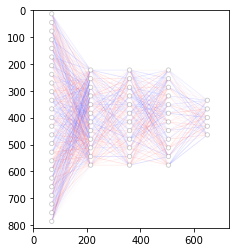

In [386]:
#afficher le reseau multi-couche :

img = mpimg.imread('photo reseau neurones .png')
imgplot = pyplot.imshow(img)
pyplot.show()

REMARQUE:
j'ai represente la couche d'entre avec une couche de 25 neurones, les couches cachees avec des couches de 12 neurones et la couche de sortie avec une couche de 10 neuronnes.


### 3.2 Representation HOG :

In [52]:
# mlpclassifer d'une mono-couche avec hog :
classifier_mlp_mono_hog = MLPClassifier(hidden_layer_sizes=(450),activation='relu',max_iter=10 , alpha=1e-4,solver='sgd', verbose=10, random_state=1,learning_rate_init=0.1)
X_train, X_test, y_train, y_test = X_hog[:52500], X_hog[52500:], y[:52500], y[52500:]
classifier_mlp_mono_hog.fit( X_train , y_train )


Iteration 1, loss = 0.30578743
Iteration 2, loss = 0.13846300
Iteration 3, loss = 0.12236384
Iteration 4, loss = 0.11092260
Iteration 5, loss = 0.10076362
Iteration 6, loss = 0.09137516
Iteration 7, loss = 0.08298676
Iteration 8, loss = 0.07666761
Iteration 9, loss = 0.06992880
Iteration 10, loss = 0.06413060


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=450, learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

In [53]:
y_est = classifier_mlp_mono_hog.predict ( X_train )
classifier_mlp_mono_hog.score (X_train ,y_train)

0.9839428571428571

In [54]:
y_est = classifier_mlp_mono_hog.predict ( X_test)
classifier_mlp_mono_hog.score (X_test ,y_test)

0.9721142857142857

In [55]:
# mlpclassifer de mulyi-couche avec hog :
classifier_mlp_multi_hog = MLPClassifier(hidden_layer_sizes=(15,10,15),activation='relu',max_iter=100 , alpha=1e-4,solver='sgd', verbose=10, random_state=1,learning_rate_init=0.1)
X_train, X_test, y_train, y_test = X_hog[:52500], X_hog[52500:], y[:52500], y[52500:]
classifier_mlp_multi_hog.fit( X_train , y_train )

Iteration 1, loss = 0.62452630
Iteration 2, loss = 0.18441038
Iteration 3, loss = 0.15591965
Iteration 4, loss = 0.14141637
Iteration 5, loss = 0.13515836
Iteration 6, loss = 0.13002553
Iteration 7, loss = 0.12596520
Iteration 8, loss = 0.12196049
Iteration 9, loss = 0.11745520
Iteration 10, loss = 0.11761541
Iteration 11, loss = 0.11433314
Iteration 12, loss = 0.11185178
Iteration 13, loss = 0.11193509
Iteration 14, loss = 0.10943892
Iteration 15, loss = 0.10744617
Iteration 16, loss = 0.10776232
Iteration 17, loss = 0.10613332
Iteration 18, loss = 0.10477097
Iteration 19, loss = 0.10295913
Iteration 20, loss = 0.10057059
Iteration 21, loss = 0.10155990
Iteration 22, loss = 0.10030380
Iteration 23, loss = 0.09879982
Iteration 24, loss = 0.09873807
Iteration 25, loss = 0.09843414
Iteration 26, loss = 0.09725069
Iteration 27, loss = 0.09688294
Iteration 28, loss = 0.09633137
Iteration 29, loss = 0.09689532
Iteration 30, loss = 0.09490703
Iteration 31, loss = 0.09544969
Iteration 32, los

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(15, 10, 15), learning_rate_init=0.1,
              max_iter=100, random_state=1, solver='sgd', verbose=10)

In [56]:
y_est = classifier_mlp_multi_hog.predict ( X_train )
classifier_mlp_multi_hog.score (X_train ,y_train)

0.9775047619047619

REMARQUES :

avec les representations HOG, on peut reduire le nombre de neurones et aussi d'executer plus rapidement l'entrainemet de la base de donnees

# TP 4 : Traitement de donnees reelles :
## 2 Mise en place :
### 2.2 Pre-traitement des donnees :

(78, 675, 4)

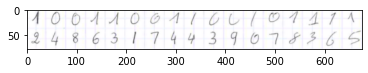

In [407]:
# charger l'image :
digits = mpimg.imread("digits.png")
pyplot.imshow(digits)# afficher l'image
np.shape(digits)# verifier le nombre de couches

REMARQUES : 

on voit que bel et bien l'image contient plusieurs matrices
des couches de couleurs 

In [408]:
#fusionner les couches en une seule couche :
digits = np.mean(digits ,2)
np.shape(digits) # verification 

(78, 675)

Apres avoir fusionner les couches on peut voir qu'on a maintenant une seule matrice

In [410]:
# Verifiez par la meme occasion que les entrees de digits sont dans l’intervalle[0,1] : 
print("les entrees de digits sont dans l'intervale : [",np.min(digits),",",np.max(digits),"]")

les entrees de digits sont dans l'intervale : [ 0.48235294 , 1.0 ]


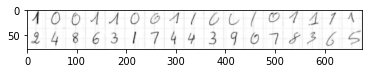

In [411]:
# visualisation de l'image : 
pyplot.imshow(digits,cmap="gray")# afficher l'image

En utilisant a nouveau l’astuce de propagation, proposez une solution qui nous permet : 
- de ne conserver que les valeurs de digits superieures a un seuil (les pixels les plus blancs) et met les
autres a zero (le fond noir).

REMARQUES : 
- pour faire ca je vais utiliser deux boucles while imbriquees qui vont me permetre de parcourir tous les pixels dans digits, et par la suite mettre tous les pixels qui sont superieur a 0.93 a zero et conserver le reste

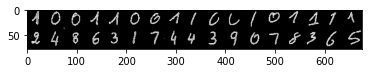

In [412]:
pixel_ligne=0
while pixel_ligne<78 :
    pixel_cologne=0
    while pixel_cologne <675 :
        if digits[pixel_ligne,pixel_cologne] > 0.93 :
            digits[pixel_ligne,pixel_cologne]=0
        pixel_cologne+=1
    pixel_ligne+=1
pyplot.imshow(digits,cmap="gray")# afficher a nouveau l'image 

### 2.3 Decoupage et mise a l’echelle :

Pour touver les coordonnes de la premiere image :
- J'ai diviser la largeur de l'image par le nombre d'image par cologne plus 1 donc : 1+78/2= 40, et j'ai diviser la longeur de l'image par le nombre d'images par ligne plus 1 donc : 1+675/17=40

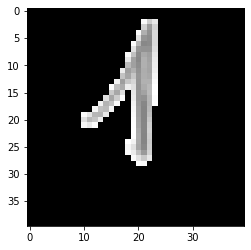

In [413]:
pyplot.imshow(digits[0:40,0:40],cmap="gray")

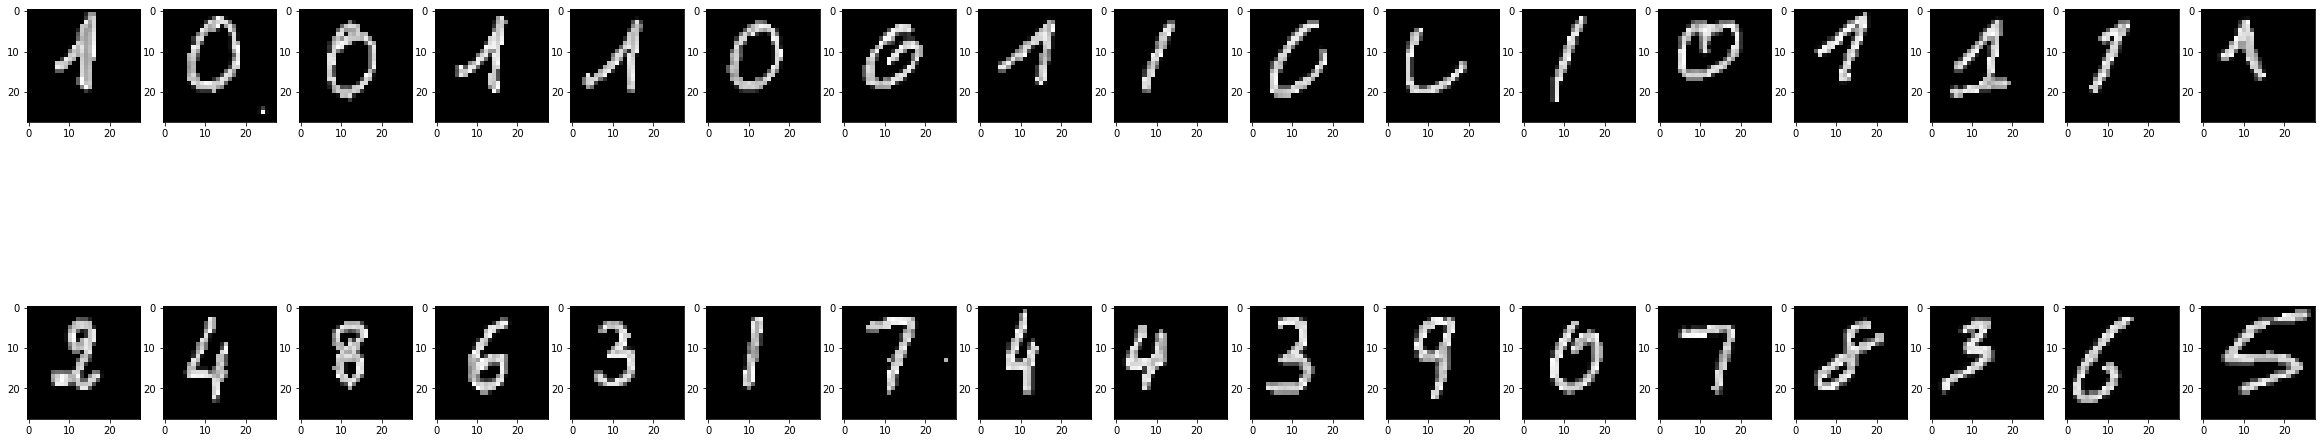

In [419]:
#Affichez alors toutes les images automatiquement decoupees :
figure,axis= pyplot.subplots(2,17,figsize =(41,10))
pixel_ligne=0
index_ligne=0
listeDeDigits=[] # une liste pour recuperer toutes les images decoupes
while pixel_ligne < 40 and index_ligne < 2 :
   pixel_cologne=0 
   index_cologne =0
   while pixel_cologne<675 and index_cologne < 17:
      output = resize(digits[pixel_ligne:pixel_ligne+40, pixel_cologne:pixel_cologne+40],(28,28))
      listeDeDigits.append(output)
      axis[index_ligne,index_cologne].imshow(output , cmap ="gray")
      index_cologne+=1
      pixel_cologne+=40
   index_ligne+=1
   pixel_ligne+=39

## 3 - CLASSIFICATION :

pour cette partie j'ai creer un progrmae interactif qui va demander a l'utilisateur : 
- (i) le type de representation(donnees brutes/hog)
- (ii) le type de classifieur(svm/knn/mlp)
- (iii) le type de kernel ou le nombre de couche pour le mlp 

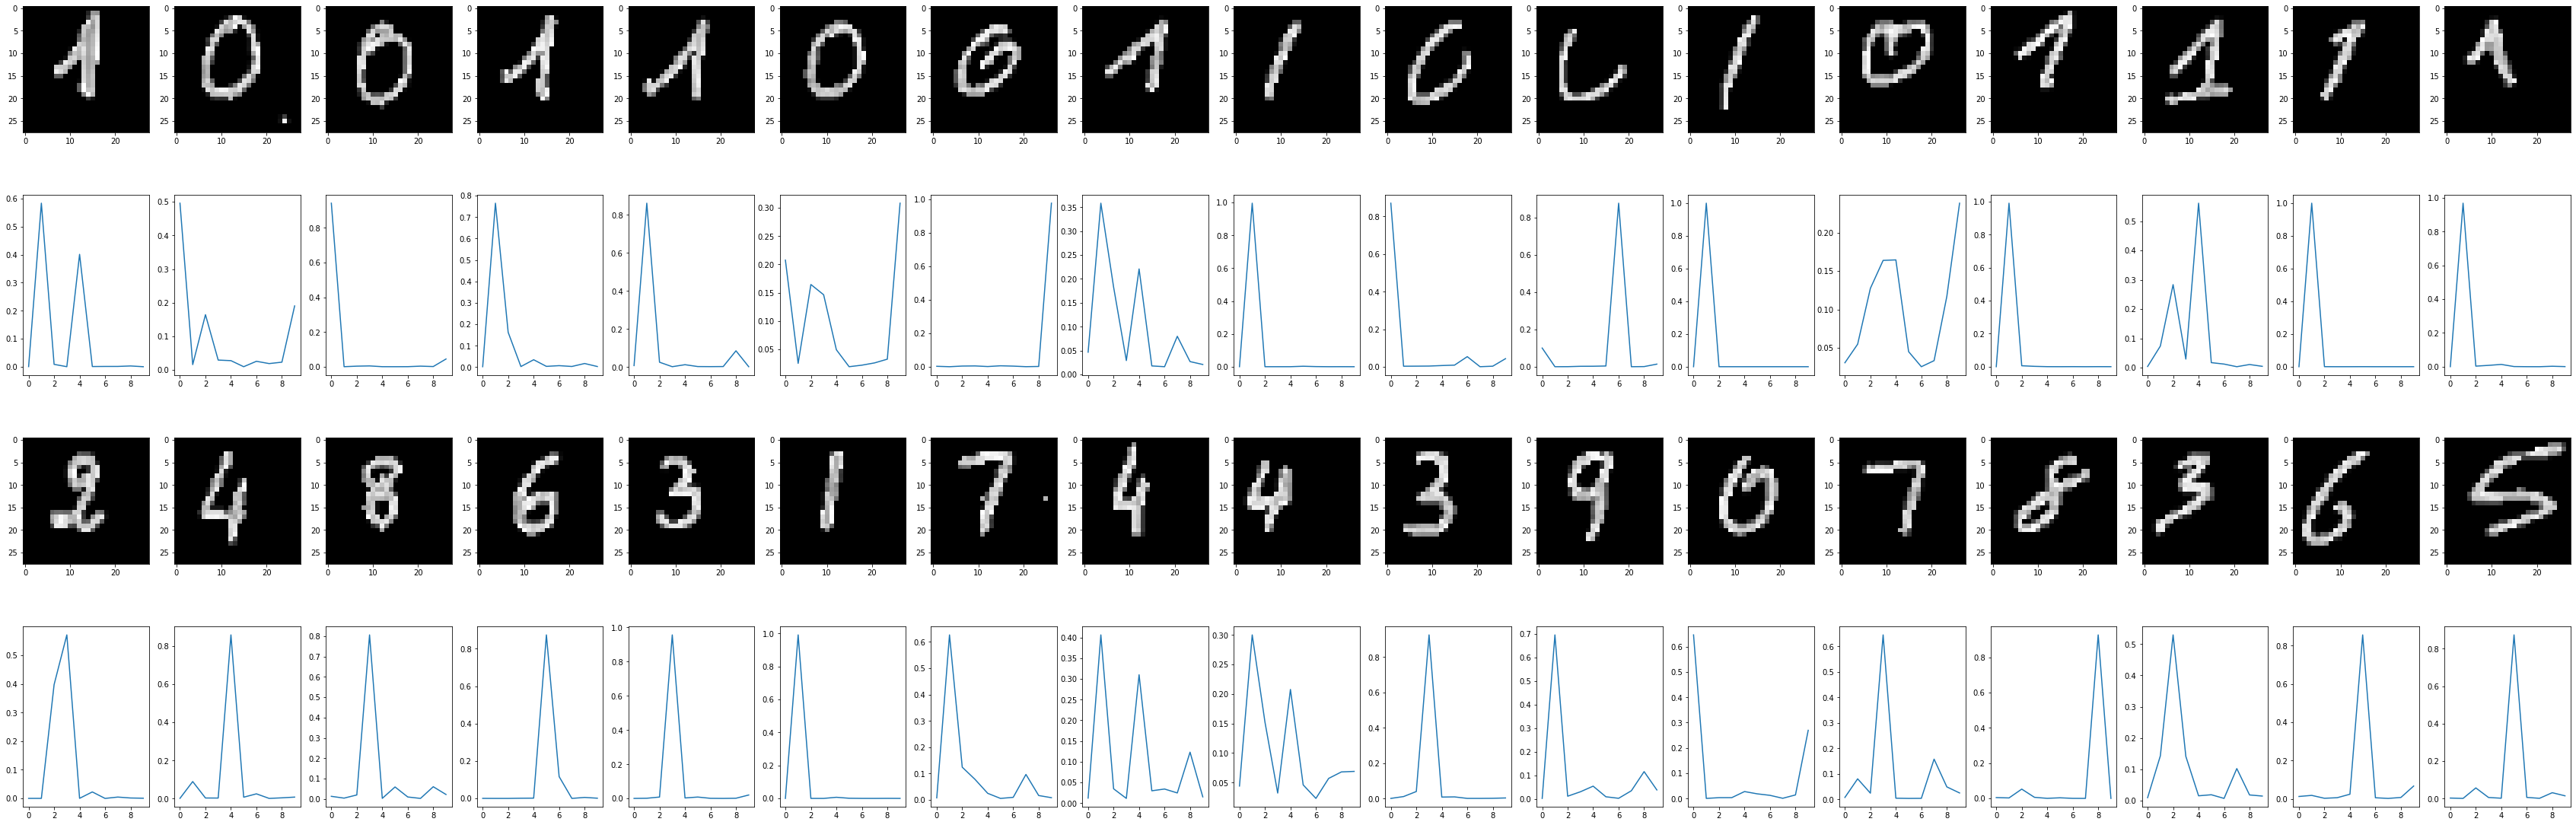

In [423]:
typeDeRepresentation = input("quelle type de respresentation voulez_vous ?(donnees brutes / hog")
####### partie HOG ################
if typeDeRepresentation == "hog" :
    typeDeClassifeur = input("quelle type de classifeur voulez_vous ?(svm/knn/mlp")
    if typeDeClassifeur== "svm" :
        typeDeSvm = input("quelle type de svm voulez_vous ?(linear/ non-linear)")
        if typeDeSvm== "linear" :
            classifieur = classifier_hog_linear
        elif typeDeSvm == "non-linear" :
            typeDeKernel = input("quelle type de kernel voulez_vous ?(rbf/poly/sigmoid)")
            if typeDeKernel == "rbf" :
                classifieur = classifier_hog_rbf
            elif typeDeKernel == "poly" :
                classifieur = classifier_hog_poly
            elif typeDeKernel == "sigmoid" :
                classifieur = classifier_hog_sigmoid
    elif typeDeClassifeur== "knn" :
        classifieur = knn_hog
    elif typeDeClassifeur== "mlp" :
        typeDeMlp = input("quelle type de mlp voulez_vous ?(mono-couche/multi-couche)")
        if typeDeMlp == "mono-couche" :
            classifieur = classifier_mlp_mono_hog
        elif typeDeMlp == "multi-couche" :
            classifieur = classifier_mlp_multi_hog
    # apres avoir recuperer toutes les informations sur le classifieur souhaite par l'utilisateur on dessine les graphs de probabilite
    ######### graph hog   #############
    figure,axis= pyplot.subplots(4,17,figsize =(60,20))
    nbrLigne=0
    idxLigne=0
    idxImageMax = 17
    idxImageMini=0
    while nbrLigne < 4:
        idxCol =0
        if idxLigne == 0 or idxLigne == 2 :# ici on affiche toutes les images decoupees
            while  idxImageMini< idxImageMax:
                play = False
                axis[idxLigne,idxCol].imshow(listeDeDigits[idxImageMini] , cmap ="gray")
                idxCol+=1
                idxImageMini+=1
            idxImageMini-=17
        elif idxLigne == 1 or idxLigne == 3 :
            play = True
            while  idxImageMini< idxImageMax :# ici on print les graphs de propabilite
                image = listeDeDigits[idxImageMini]
                image.reshape(28,28)
                fd , hog_image = hog(image, orientations=10, pixels_per_cell=(6, 6),cells_per_block=(1, 1), visualize=True)
                liste_y = classifieur.predict_proba(fd.reshape(1, -1))
                liste_x = [0,1,2,3,4,5,6,7,8,9]
                axis[idxLigne,idxCol].plot(liste_x,liste_y.reshape(10))
                idxCol+=1
                idxImageMini+=1
        if play == True :
            idxImageMini = 17
            idxImageMax = 34
        idxLigne+=1
        nbrLigne+=1
########## partie DONNEES BRUTES ############       
elif typeDeRepresentation == "donnees brutes" :
    typeDeClassifeur = input("quelle type de classifeur voulez_vous ?(svm/knn/mlp")
    if typeDeClassifeur== "svm" :
        typeDeSvm = input("quelle type de svm voulez_vous ?(linear/ non-linear)")
        if typeDeSvm== "linear" :
            classifieur = classifier_linear
        elif typeDeSvm == "non-linear" :
            typeDeKernel = input("quelle type de kernel voulez_vous ?(rbf/poly/sigmoid/)")
            if typeDeKernel == "rbf" :
                classifieur = classifier_rbf
            elif typeDeKernel == "poly" :
                classifieur = classifier_poly
            elif typeDeKernel == "sigmoid" :
                classifieur = classifier_sigmoid
    elif typeDeClassifeur== "knn" :
        classifieur = knn_X
    elif typeDeClassifeur== "mlp" :
        typeDeMlp = input("quelle type de mlp voulez_vous ?(mono-couche/multi-couche)")
        if typeDeMlp == "mono-couche" :
            classifieur = classifier_mlp_mono
        elif typeDeMlp == "multi-couche" :
            classifieur = classifier_mlp_multi
    # apres avoir recuperer toutes les informations sur le classifieur souhaite par l'utilisateur on dessine les graphs de probabilite
    ######### graph DONNEES BRUTES   #############
    figure,axis= pyplot.subplots(4,17,figsize =(60,20))
    nbrLigne=0
    idxLigne=0
    idxImageMax = 17
    idxImageMini=0
    while nbrLigne < 4:
        idxCol =0
        if idxLigne == 0 or idxLigne == 2 : # ici on affiche les images
            while  idxImageMini< idxImageMax:
                play = False
                axis[idxLigne,idxCol].imshow(listeDeDigits[idxImageMini] , cmap ="gray")
                idxCol+=1
                idxImageMini+=1
            idxImageMini-=17
        elif idxLigne == 1 or idxLigne == 3 :
            play = True
            while  idxImageMini< idxImageMax : # ici on affiche les graphs de propabilite
                liste_y = classifieur.predict_proba(np.ravel(listeDeDigits[idxImageMini]).reshape(1,-1))
                liste_x = [0,1,2,3,4,5,6,7,8,9]
                axis[idxLigne,idxCol].plot(liste_x,liste_y.reshape(10))
                idxCol+=1
                idxImageMini+=1
        if play == True :
            idxImageMini = 17
            idxImageMax = 34
        idxLigne+=1
        nbrLigne+=1
      
 

REMARQUES :

Apres avoir tester de differents classifieur on peut noter que :
- Avec les donnes brutes, le classieur reconnait bien les chiffres bien ecrits et bien centre, par contre il a du mal a reconaitre les chiffres mal ecrits comme les zeros coupes ou les 8 et 1 avec une rotation 
- Avec les representation hog, la reconaissance des chiffres mal ecrits ou pas droits s'ameliore un peu.

# TP 5 Automatisation de la detection de chiffres manuscrits :
## 2 Approche par extension de la base de donnees :
### 2.1 Extension de la base :

In [73]:
# creer des images mal centres :
listeDesImagesMalCentres = []
Z = []
for decalage in [15,25,40,50,60,75] : # les niveaux de decentrage
    for numero in range(0,10):
        for index in range(0,100) :
            z =numero
            image = X[y ==str(z)][index]
            image = np.roll(image,decalage)
            listeDesImagesMalCentres.append(image)
            Z.append("z")



In [74]:
# creer des images noirs :
X_imagenoir = np.zeros((100,784))
Y_imagenoir = ["image noir"]*100

In [75]:
# ajouter les images crees a la base de donnees :
X_plus = np.concatenate([X,listeDesImagesMalCentres,X_imagenoir])
y_plus = np.concatenate([y,Z,Y_imagenoir])

In [76]:
# melanger les X et y de la meme maniere :
seed =np.random.get_state()
np.random.shuffle(X_plus)
np.random.set_state(seed)
np.random.shuffle(y_plus)


### 2.2 Classification par fenetre glissante :

In [77]:
#trensformer X_plus en X_plus_hog :
X_plus_hog = []
for i in X_plus:
    fd = hog(i.reshape((28,28)), orientations=10, pixels_per_cell=(6, 6),cells_per_block=(1, 1))
    X_plus_hog.append(fd)

In [78]:
# creer X_plus_binaire :
X_plus_binaire = X_plus[(y_plus=="0")+(y_plus=="1")+(y_plus=="z")+(y_plus=="image noir")]
y_plus_binaire = y_plus[(y_plus=="0")+(y_plus=="1")+(y_plus=="z")+(y_plus=="image noir")]

In [79]:
# # relancer un svm non-linear rbf binaire sur X_plus : 
classifier_rbf_X_plus_binaire = svm.SVC( kernel = 'rbf', gamma = 'scale' , shrinking = False,probability=True)
X_train, X_test, y_train, y_test = X_plus_binaire[:14300], X_plus_binaire[14300:], y_plus_binaire[:14300],y_plus_binaire[14300:]
classifier_rbf_X_plus_binaire.fit( X_train , y_train )
y_est = classifier_rbf_X_plus_binaire.predict ( X_test )
classifier_rbf_X_plus_binaire.score (X_test ,y_test )

0.9992401215805471

In [80]:
# relancer un svn non-linear rbf sur X_plus :
classifier_rbf_X_plus =  svm.SVC( kernel = 'rbf', gamma = 'scale', shrinking = False,probability=True)
X_train, X_test, y_train, y_test = X_plus[:60000], X_plus[60000:], y_plus[:60000], y_plus[60000:]
classifier_rbf_X_plus.fit( X_train , y_train )
y_est = classifier_rbf_X_plus.predict ( X_test )
classifier_rbf_X_plus.score (X_test ,y_test )

0.9791925465838509

In [81]:
# relancer un mlp multi couche sur X_plus_hog :
classifier_mlp_multi_X_plus_hog = MLPClassifier(hidden_layer_sizes=(15,10,15),activation='relu',max_iter=100 , alpha=1e-4,solver='sgd', verbose=10, random_state=1,learning_rate_init=0.1)
X_train, X_test, y_train, y_test = X_plus_hog[:58000], X_plus_hog[58000:], y_plus[:58000], y_plus[58000:]
classifier_mlp_multi_X_plus_hog.fit( X_train , y_train )
y_est = classifier_mlp_multi_X_plus_hog.predict ( X_train )
classifier_mlp_multi_X_plus_hog.score (X_train ,y_train)

Iteration 1, loss = 0.72590899
Iteration 2, loss = 0.23923189
Iteration 3, loss = 0.19713855
Iteration 4, loss = 0.17297252
Iteration 5, loss = 0.16043883
Iteration 6, loss = 0.14984354
Iteration 7, loss = 0.14627832
Iteration 8, loss = 0.13996650
Iteration 9, loss = 0.13628017
Iteration 10, loss = 0.13400585
Iteration 11, loss = 0.12959483
Iteration 12, loss = 0.12683972
Iteration 13, loss = 0.12488508
Iteration 14, loss = 0.12350654
Iteration 15, loss = 0.12188459
Iteration 16, loss = 0.12081025
Iteration 17, loss = 0.11961732
Iteration 18, loss = 0.11738635
Iteration 19, loss = 0.11710971
Iteration 20, loss = 0.11582770
Iteration 21, loss = 0.11479286
Iteration 22, loss = 0.11520848
Iteration 23, loss = 0.11254401
Iteration 24, loss = 0.11320467
Iteration 25, loss = 0.11169188
Iteration 26, loss = 0.11132926
Iteration 27, loss = 0.11009121
Iteration 28, loss = 0.10874366
Iteration 29, loss = 0.11007942
Iteration 30, loss = 0.10786498
Iteration 31, loss = 0.10939150
Iteration 32, los

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9737586206896551

In [86]:
# relancer un svn non-linear rbf sur X_plus_hog :
classifier_rbf_X_plus_hog = svm.SVC( kernel = 'rbf', gamma = 'scale' , shrinking = False,probability=True)
X_train, X_test, y_train, y_test = X_plus_hog[:58000], X_plus_hog[58000:], y_plus[:58000], y_plus[58000:]
classifier_rbf_X_plus_hog.fit( X_train , y_train )
y_est = classifier_rbf_X_plus_hog.predict ( X_train )
classifier_rbf_X_plus_hog.score (X_train ,y_train)

0.9917586206896551

In [393]:
# cette fenction permet d'afficher les images en noir et blanc
def modifierImage1() :
    nomFichierImage = input("entrez le nom du fichier contenant l'image ?")
    digits = mpimg.imread(nomFichierImage)
    if len(np.shape(digits)) > 2 :
        digits = np.mean(digits ,2)
    a = np.max(digits)
    b= np.min(digits)
    digits = a - digits 
    digits = digits + b
    digits = np.round(digits)
    return digits
# cette fenction recupere des infos sur la fenetre glissante et l'image
def infoFenetreGlissante1(image) :
    largeur_image = np.shape(image)[0]
    longeur_image = np.shape(image)[1]
    top_left_image_X = int(input("veuillez entrez la coordone x du point le plus haut a gauche :"))
    top_left_image_Y = int(input("veuillez entrez la coordone Y du point le plus haut a gauche :"))
    valuerDecalage = int(input("avec combien de pixel voulez vous decaller la fenetre glissante a chaque fois ?"))
    largeur_fenetre_glissante  = int(input("veuillez entrez la largeur de la fenetre glissante"))
    longeur_fenetre_glissante  = int(input("veuillez entrez la longeur de la fenetre glissante"))
    return largeur_image,longeur_image,top_left_image_X,top_left_image_Y,valuerDecalage,largeur_fenetre_glissante,longeur_fenetre_glissante

 

In [424]:
# j'ai creer cette fonction qui permet de faire tout le travaille de la fenetre glissante
def fenetreGlissante1 () :
    digits = modifierImage1() 
    largeur_image,Longeur_image,top_left_image_X,top_left_image_Y,valuerDecalage,largeur_fenetre_glissante,Longeur_fenetre_glissante = infoFenetreGlissante1(digits)
    listeDeNumerosIdentifies=[]
    listeDes_X_pos = []
    listeDes_y_pos = []
    while top_left_image_Y < largeur_image :
        top_left_image_X_copy = top_left_image_X
        while top_left_image_X_copy < Longeur_image :
            fenetre = resize(digits[top_left_image_Y:top_left_image_Y+largeur_fenetre_glissante,top_left_image_X_copy:top_left_image_X_copy+ Longeur_fenetre_glissante],(28,28))
            fd,fentre = hog(fenetre.reshape((28,28)), orientations=10, pixels_per_cell=(6, 6),cells_per_block=(1, 1), visualize=True)
            y_est1 = classifier_rbf_X_plus_hog.predict(fd.reshape(1,-1))
            if (y_est1 == "z" or y_est1 == "image noir") :
                top_left_image_X_copy += valuerDecalage 
            else :
                listeDeNumerosIdentifies.append(str(y_est1))
                listeDes_X_pos.append(top_left_image_X_copy)
                listeDes_y_pos.append(top_left_image_Y)
                top_left_image_X_copy+= Longeur_fenetre_glissante
        top_left_image_Y += largeur_fenetre_glissante

    return listeDeNumerosIdentifies,listeDes_X_pos,listeDes_y_pos,largeur_fenetre_glissante,Longeur_fenetre_glissante 


### 2.3 Visualisation :


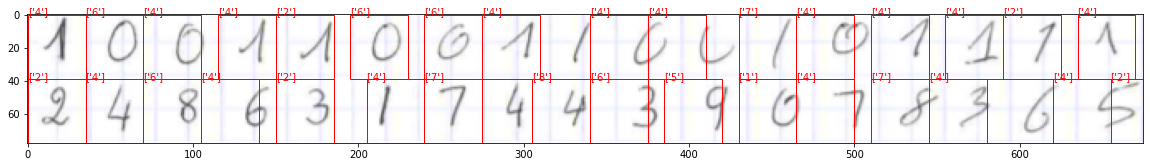

In [397]:
listeDeNumerosIdentifies,listeDes_X_pos,listeDes_y_pos,largeur_fenetre_glissante,Longeur_fenetre_glissante  = fenetreGlissante1 ()
fig , ax = pyplot.subplots ( figsize =(20 ,30) )
ax.imshow ( mpimg.imread ("digits.png") , cmap = "gray")
idx = 0 
while idx<len(listeDes_X_pos) :
    xpos = listeDes_X_pos[idx]
    ypos = listeDes_y_pos[idx]
    height = largeur_fenetre_glissante
    width = Longeur_fenetre_glissante
    rect = patches.Rectangle((xpos,ypos),width,height,linewidth =1,edgecolor ="r",facecolor ="none")
    ax.add_patch ( rect )
    label =listeDeNumerosIdentifies[idx]
    ax.text ( xpos,ypos,label,color="r")
    idx+=1

REMARQUES :
- Cette methode parait plutot efficace, malgre le fait qu'on doit utiliser les representation hog car sans ces derniers les resultats sont pas assez bon, elle est peu couteuse et aussi facile a coder, et a comprendre pour quelqu'un qui n'a pas assez beaucoup de conaissances dans le machin learning


## 3 SVM simple-classe :


In [128]:
# Training
X_train = X_hog[:52500]
ocsvm = OneClassSVM(kernel="rbf")
ocsvm.fit(X_train)

OneClassSVM()

In [427]:
# test pour trouver le suil :
#test1
fenetre = resize(digits[0:40,40:80],(28,28))
fd,fentre = hog(fenetre.reshape((28,28)), orientations=10, pixels_per_cell=(6, 6),cells_per_block=(1, 1), visualize=True)
print(ocsvm.score_samples(fd.reshape(1,-1))[0])
#test2
fenetre = resize(digits[0:40,60:80],(28,28))
fd,fentre = hog(fenetre.reshape((28,28)), orientations=10, pixels_per_cell=(6, 6),cells_per_block=(1, 1), visualize=True)
print(ocsvm.score_samples(fd.reshape(1,-1))[0])
#test3
fenetre = resize(digits[0:40,60:100],(28,28))
fd,fentre = hog(fenetre.reshape((28,28)), orientations=10, pixels_per_cell=(6, 6),cells_per_block=(1, 1), visualize=True)
print(ocsvm.score_samples(fd.reshape(1,-1))[0])

3913.780273913343
3170.6176248533184
3334.8349448227536


- je decide de prendre comme la valeur 3900 pour le seuil 

In [425]:
def SVM_simple_classe():
    digits = modifierImage1() 
    largeur_image,Longeur_image,top_left_image_X,top_left_image_Y,valuerDecalage,largeur_fenetre_glissante,Longeur_fenetre_glissante = infoFenetreGlissante1(digits)
    listeDeNumerosIdentifies=[]
    listeDes_X_pos = []
    listeDes_y_pos = []
    while top_left_image_Y < largeur_image :
        top_left_image_X_copy = top_left_image_X
        while top_left_image_X_copy < Longeur_image :
            fenetre = resize(digits[top_left_image_Y:top_left_image_Y+largeur_fenetre_glissante,top_left_image_X_copy:top_left_image_X_copy+ Longeur_fenetre_glissante],(28,28))
            fd,fentre = hog(fenetre.reshape((28,28)), orientations=10, pixels_per_cell=(6, 6),cells_per_block=(1, 1), visualize=True)
            propabilite =ocsvm.score_samples(fd.reshape(1,-1))[0]
            y_est1 = classifier_hog_rbf.predict(fd.reshape(1,-1))
            if propabilite <3900 :# definir le seuil 
                top_left_image_X_copy += valuerDecalage 
            else :
                listeDeNumerosIdentifies.append(str(y_est1))
                listeDes_X_pos.append(top_left_image_X_copy)
                listeDes_y_pos.append(top_left_image_Y)
                top_left_image_X_copy+= Longeur_fenetre_glissante
        top_left_image_Y += largeur_fenetre_glissante
    return listeDeNumerosIdentifies,listeDes_X_pos,listeDes_y_pos,largeur_fenetre_glissante,Longeur_fenetre_glissante



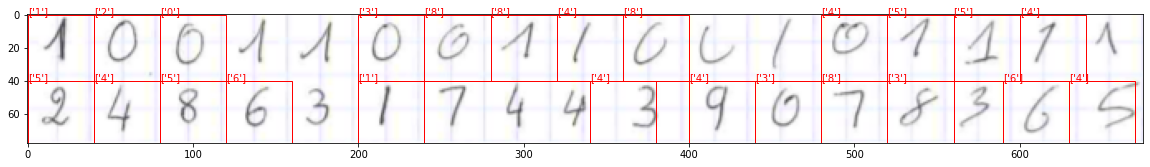

In [428]:
listeDeNumerosIdentifies,listeDes_X_pos,listeDes_y_pos,largeur_fenetre_glissante,Longeur_fenetre_glissante = SVM_simple_classe()
fig , ax = pyplot.subplots ( figsize =(20 ,30) )
ax.imshow ( mpimg.imread ("digits.png") , cmap = "gray")
idx = 0 
while idx<len(listeDes_X_pos) :
    xpos = listeDes_X_pos[idx]
    ypos = listeDes_y_pos[idx]
    width = largeur_fenetre_glissante
    height = Longeur_fenetre_glissante
    rect = patches.Rectangle((xpos,ypos),height,width,linewidth =1,edgecolor ="r",facecolor ="none")
    ax.add_patch ( rect )
    label =listeDeNumerosIdentifies[idx]
    ax.text ( xpos,ypos,label,color="r")
    idx+=1

REMARQUES :

- Cette methode parait moins efficace que la methode precedente vu qu'il est pratiquement impossible de defiri avec exactetude le seuil et aussi il est impossible de savoir si le classifieur simple-classe ne se trompe pas.
- Pour un non-expert, je le conseillerai d'utiliser la premiere methode, parce que elle assez simple a comprendre et a assimiler et facile a realiser

# TP 6 : Competition d’intelligence artificielle : 

Dans cette partie je vais :

- (i)  D'abord modifer les fenctions(modifierImage1,infoFenetreGlissante1 et fenetreGlissante1) pour qu'ils recoivent directement les parametres necessaire a leurs fenctionement et qu'ils soivent moins interactif avec l'utilisateur, afin que ce dernier puisse avoir les resultats directement juste en entrant le nom du fichier contenant l'image du cheque dans la fenction read_cheque.

In [433]:
def modifierImage2(digits) :
    if len(np.shape(digits)) > 2 :
        digits = np.mean(digits ,2)
    a = np.max(digits)
    b= np.min(digits)
    digits = a - digits 
    digits = digits + b

    digits = np.round(digits)
    return digits

def infoFenetreGlissante2(image) :
    largeur_image = np.shape(image)[0]
    longeur_image = np.shape(image)[1]
    top_left_image_X = 0
    top_left_image_Y = 0
    valeurDecalage = 2
    largeur_fenetre_glissante  = largeur_image
    return largeur_image,longeur_image,top_left_image_X,top_left_image_Y,largeur_fenetre_glissante,valeurDecalage


In [434]:
def fenetreGlissante2(digits,Longeur_fenetre_glissante):
    largeur_image,Longeur_image,top_left_image_X,top_left_image_Y,largeur_fenetre_glissante,valeurDecalage = infoFenetreGlissante2(digits)
    listeDeNumerosIdentifies= ""
    listeDes_X_pos = []
    listeDes_y_pos = []
    while top_left_image_Y < largeur_image :
        top_left_image_X_copy = top_left_image_X
        while top_left_image_X_copy < Longeur_image :
            fenetre = resize(digits[top_left_image_Y:top_left_image_Y+largeur_fenetre_glissante,top_left_image_X_copy:top_left_image_X_copy+ Longeur_fenetre_glissante],(28,28))
            fd,fentre = hog(fenetre.reshape((28,28)), orientations=10, pixels_per_cell=(6, 6),cells_per_block=(1, 1), visualize=True)
            y_est1 = classifier_rbf_X_plus_hog.predict(fd.reshape(1,-1))
            if (y_est1 == "z" or y_est1 == "image noir") :
                top_left_image_X_copy += valeurDecalage
            else :
                y_est1 = classifier_mlp_mono_hog.predict(fd.reshape(1,-1))
                listeDeNumerosIdentifies+=str(y_est1)
                listeDes_X_pos.append(top_left_image_X_copy)
                listeDes_y_pos.append(top_left_image_Y)
                top_left_image_X_copy+= Longeur_fenetre_glissante
        top_left_image_Y += largeur_fenetre_glissante
    return listeDeNumerosIdentifies

- (ii)  l'idee de mon progrmamme c'est de recuperes  les images qui contiennent les chiffres dont on a besoin, ensuit d'utiliser ma fenction fentreGlissee2, en modifiant la longeur de la fenetre, c'est a dire pour le numero du cheque et le numero du compte on sait que le premier il est compose de 6 chiffres et le deuxieme de 30 chiffres donc dans ce cas la longeur = longeur_image/nbr_chiffre,par contre pour la date et le montant j'ai mis par default la longeure de la fentre a 30 pixels, ce qui correspend en general a l'image d'un seul chiffre 

petite remarque : Pour plus de precision j'ai diviser le numero du compte en 7 parties vu qu'il y a des espaces des fois entre les chiffres

In [439]:
def read_check (nomFichierImage:str) :
    imageCheque = mpimg.imread(nomFichierImage)
    #afficher l'image des differentes parties du cheque ( montant,date....) :
    fig , (ax1, ax2, ax3, ax4)= pyplot.subplots (4, 1)

    montant = imageCheque[150:220,860:1100]
    ax1.imshow(montant,cmap='gray')

    date = imageCheque[260:290,880:1050]
    ax2.imshow(date,cmap='gray')

    num_compte = imageCheque[255:275,420:695]
    ax3.imshow(num_compte,cmap='gray')

    num_cheque = imageCheque[405:423,569:626]
    ax4.imshow(num_cheque,cmap='gray')

    # recuperer les diiferentes parties du cheque dont on a besoin 
    value = modifierImage2(imageCheque[150:220,860:1100])
    date = modifierImage2(imageCheque[260:290,880:1050])
    check_no = modifierImage2(imageCheque[405:423,569:626])
    account_part1 = modifierImage2(imageCheque[255:275,420:465])
    account_part2 = modifierImage2(imageCheque[255:275,465:510])
    account_part3 = modifierImage2(imageCheque[255:275,510:530])
    account_part4 = modifierImage2(imageCheque[255:275,532:590])
    account_part5 = modifierImage2(imageCheque[255:275,592:612])
    account_part6 = modifierImage2(imageCheque[255:275,612:632])
    account_part7 = modifierImage2(imageCheque[255:275,633:695])

    listeDesPartiesDuCheque = [value,date,check_no,account_part1,account_part2,account_part3,account_part4,account_part5,account_part6,account_part7]
    nomsDesCle = ["valeur du cheque","date du cheque","numero du Cheque","numero du compte"]
    nbrChiffreParImage=[0,0,6,5,5,2,7,2,2,7]
    dico = {}
    dico["numero du compte"] = ""
    idx=0
    while idx < len(listeDesPartiesDuCheque):
        listeDeNumerosIdentifies = ""
        if idx < 2 :
            listeDeNumerosIdentifies = fenetreGlissante2(listeDesPartiesDuCheque[idx],30)
            dico[nomsDesCle[idx]]= listeDeNumerosIdentifies
        elif idx == 2:
            listeDeNumerosIdentifies = fenetreGlissante2(listeDesPartiesDuCheque[idx],1+np.shape(listeDesPartiesDuCheque[idx])[1]//nbrChiffreParImage[idx])
            dico[nomsDesCle[idx]]= listeDeNumerosIdentifies
        else :
            listeDeNumerosIdentifies = fenetreGlissante2(listeDesPartiesDuCheque[idx],np.shape(listeDesPartiesDuCheque[idx])[1]//nbrChiffreParImage[idx])
            dico["numero du compte"] += listeDeNumerosIdentifies
        idx += 1
    return dico

{'numero du compte': "['7']['5']['2']['3']['3']['0']['0']['3']['3']['0']['3']['0']['7']['2']['2']['5']['5']['5']['3']['2']['2']['0']['0']['0']['2']['5']['3']",
 'valeur du cheque': "['9']['6']['5']['3']['2']['5']",
 'date du cheque': "['7']['1']['1']",
 'numero du Cheque': "['0']['0']['0']['3']['6']"}

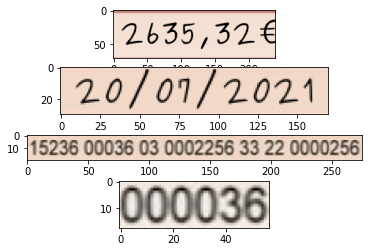

In [440]:
read_check("cheque1.png")

REMARQUES :
- Apres avoir faits de differentes modifications, c'est malheuresement la version la plus efficace que j'ai pu faire, je vois que mon algo il arrive quand-meme a reconaitre les chiffres imprimes mais pas a 100%, parcontre pour les chiffres manuscrits, c'est pas dutout efficace.